In [1]:
import os
import pickle
import random
import sys
import warnings

sys.path.append(os.path.join(".."))

import optuna
import numpy as np
import catboost
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score

In [2]:
# Read dictionary pkl file
with open(os.path.join('..', 'data', 'processed_files', 'pkls', 'X_FR.pkl'), "rb") as fp:
    X = pickle.load(fp)

with open(os.path.join('..', 'data', 'processed_files', 'pkls', 'y_FR.pkl'), "rb") as fp:
    y = pickle.load(fp)


In [3]:
# X_train, y_train, X_val, y_val
X_train, X_val, X_test = (X[key] for key in X.keys())
y_train, y_val, y_test = (y[key].argmax(axis=1) for key in y.keys())

In [5]:
model = CatBoostClassifier(verbose=True, auto_class_weights='SqrtBalanced', eval_metric="TotalF1")
model.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=50, use_best_model=True, verbose_eval=True)


Learning rate set to 0.13127
0:	learn: 0.6308004	test: 0.6307566	best: 0.6307566 (0)	total: 18s	remaining: 4h 59m 15s
1:	learn: 0.6278875	test: 0.6272055	best: 0.6307566 (0)	total: 33.2s	remaining: 4h 35m 48s
2:	learn: 0.6362586	test: 0.6356741	best: 0.6356741 (2)	total: 48.1s	remaining: 4h 26m 17s
3:	learn: 0.6385093	test: 0.6375579	best: 0.6375579 (3)	total: 1m	remaining: 4h 13m
4:	learn: 0.6395850	test: 0.6388735	best: 0.6388735 (4)	total: 1m 14s	remaining: 4h 7m 24s
5:	learn: 0.6416224	test: 0.6408952	best: 0.6408952 (5)	total: 1m 29s	remaining: 4h 8m 24s
6:	learn: 0.6457990	test: 0.6449626	best: 0.6449626 (6)	total: 1m 46s	remaining: 4h 11m
7:	learn: 0.6509305	test: 0.6505448	best: 0.6505448 (7)	total: 2m	remaining: 4h 8m 21s
8:	learn: 0.6538007	test: 0.6533655	best: 0.6533655 (8)	total: 2m 14s	remaining: 4h 6m 22s
9:	learn: 0.6543013	test: 0.6538251	best: 0.6538251 (9)	total: 2m 27s	remaining: 4h 3m 38s
10:	learn: 0.6617903	test: 0.6611757	best: 0.6611757 (10)	total: 2m 41s	remai

In [5]:
# Specify the path to the saved CatBoost model
model_filename = os.path.join("..", "results", "pickle_models", "catboost_optimized_FR.pkl")

# Load the CatBoost model
loaded_model = CatBoostClassifier()
loaded_model.load_model(model_filename)

In [7]:
y_pred = loaded_model.predict(X_val)
f1 = f1_score(y_val, y_pred, average='weighted') 


In [9]:
# Read dictionary pkl file
with open(os.path.join('..', 'data', 'processed_files', 'pkls', 'X_holdout_FR.pkl'), "rb") as fp:
    Xholdout = pickle.load(fp)

with open(os.path.join('..', 'data', 'processed_files', 'pkls', 'y_holdout_FR.pkl'), "rb") as fp:
    yholdout = pickle.load(fp)


In [ ]:
# X_train, y_train, X_val, y_val
X_train, X_val, X_test = (X[key] for key in X.keys())
y_train, y_val, y_test = (y[key].argmax(axis=1) for key in y.keys())

              precision    recall  f1-score   support

           0       0.79      0.98      0.88   2546763
           1       0.01      0.00      0.00    147342
           2       0.07      0.02      0.03    196175
           3       0.23      0.02      0.03    332189

    accuracy                           0.78   3222469
   macro avg       0.28      0.25      0.23   3222469
weighted avg       0.66      0.78      0.70   3222469



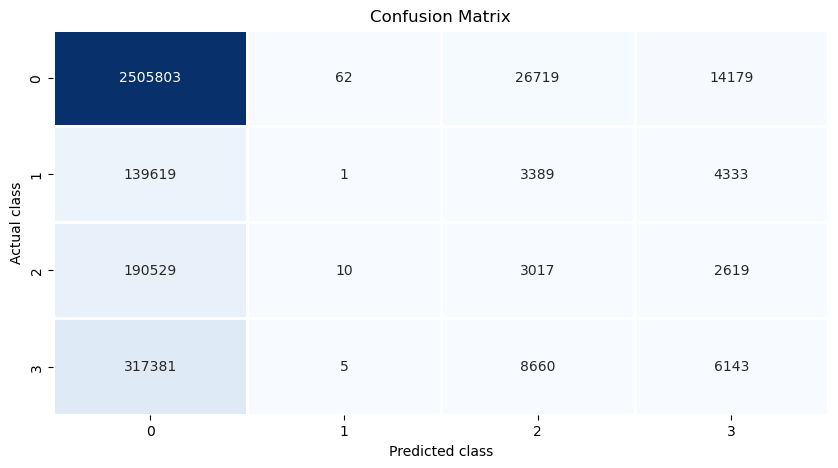

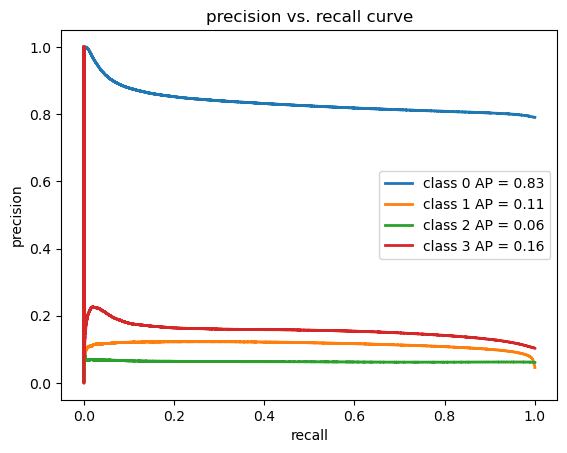

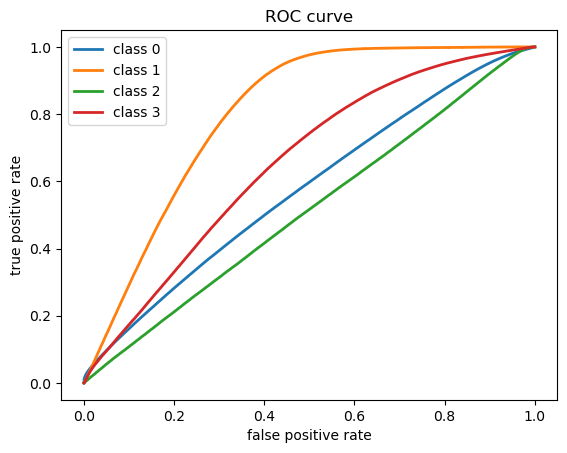

0 ROC AUC OvR: 0.5763
1 ROC AUC OvR: 0.8020
2 ROC AUC OvR: 0.5136
3 ROC AUC OvR: 0.6547
average ROC AUC OvR: 0.6367


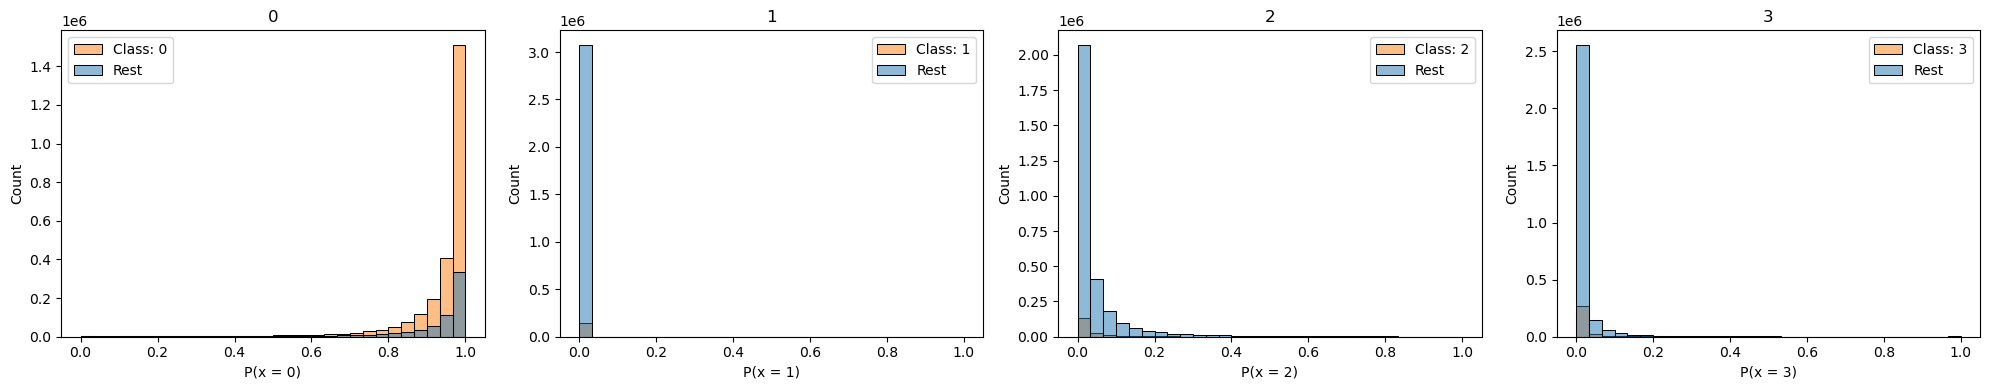

0 vs 1 ROC AUC OvO: 0.5865
1 vs 0 ROC AUC OvO: 0.8337
0 vs 2 ROC AUC OvO: 0.5672
2 vs 0 ROC AUC OvO: 0.5150
0 vs 3 ROC AUC OvO: 0.5772
3 vs 0 ROC AUC OvO: 0.6769
1 vs 2 ROC AUC OvO: 0.6900
2 vs 1 ROC AUC OvO: 0.5240
1 vs 3 ROC AUC OvO: 0.6257
3 vs 1 ROC AUC OvO: 0.4533
2 vs 3 ROC AUC OvO: 0.4986
3 vs 2 ROC AUC OvO: 0.5182
average ROC AUC OvO: 0.5888


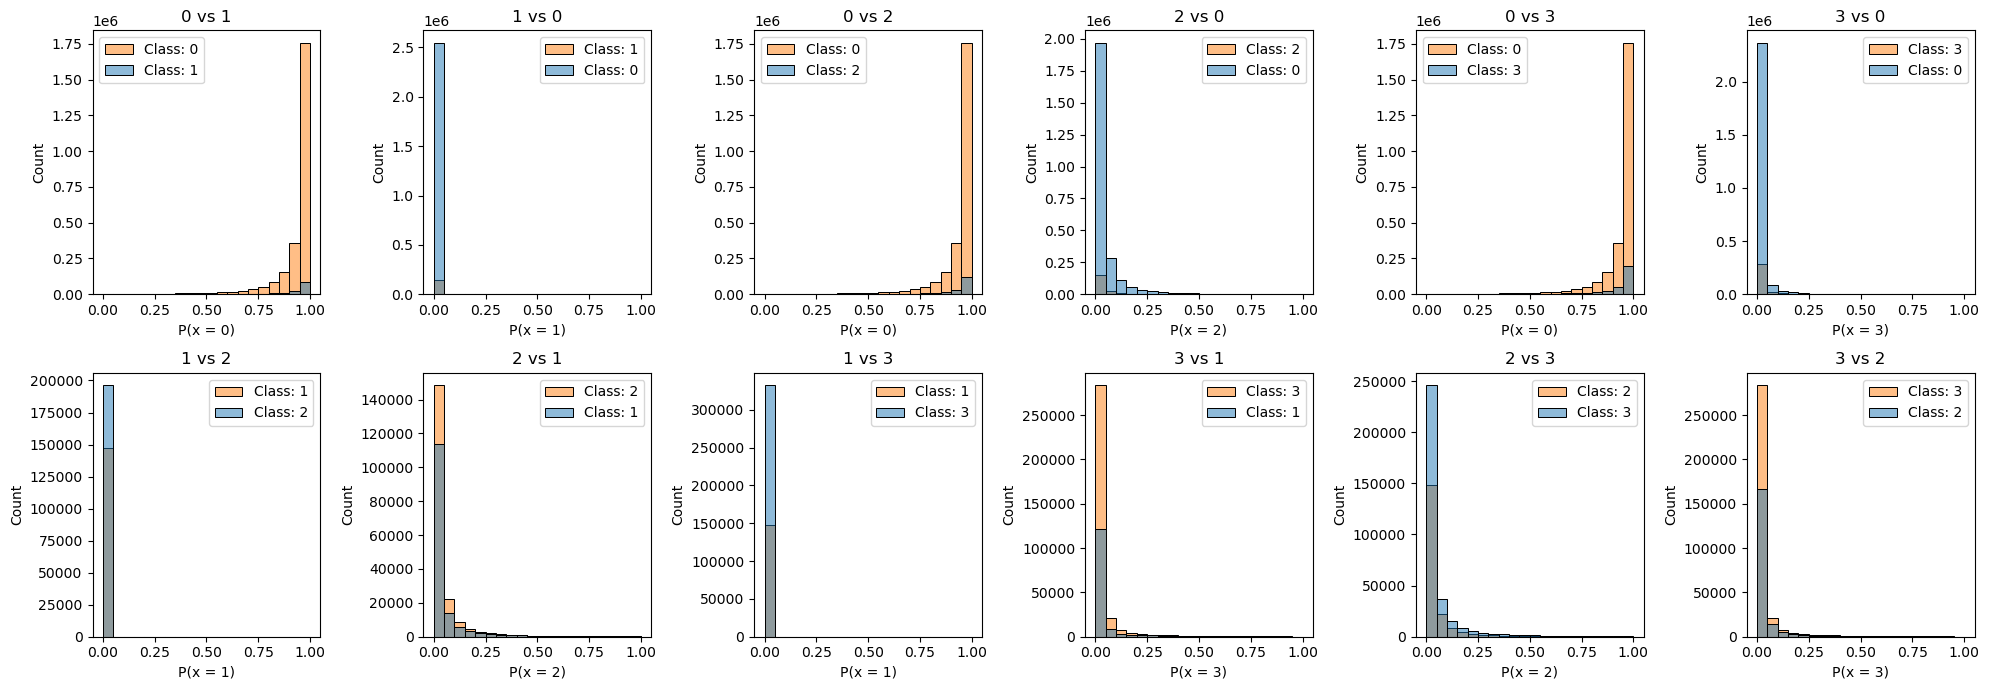

None


In [13]:
from src.model_utils import custom_multiclass_report

# check metrics
yprob = loaded_model.predict_proba(Xholdout)
ypred = np.argmax(yprob, 1)
ytest = yholdout


print(custom_multiclass_report(ytest, ypred, yprob))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95   1756750
           1       0.71      0.47      0.57     23992
           2       0.74      0.53      0.62    126614
           3       0.71      0.67      0.69    274614

    accuracy                           0.90   2181970
   macro avg       0.77      0.66      0.71   2181970
weighted avg       0.89      0.90      0.89   2181970



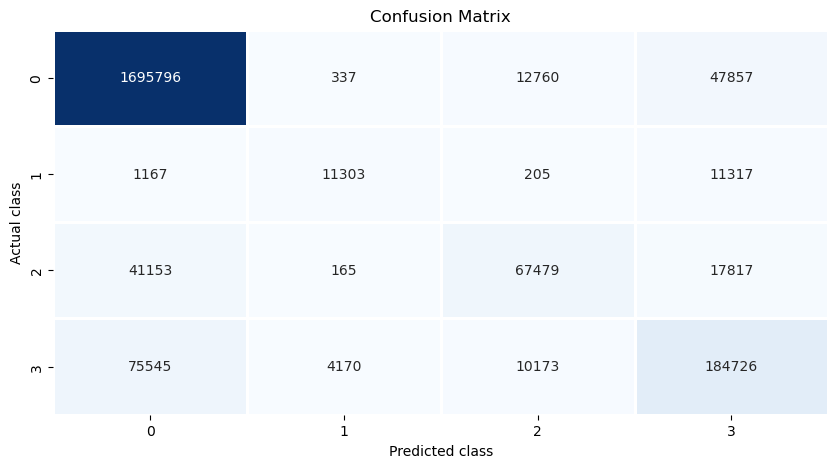

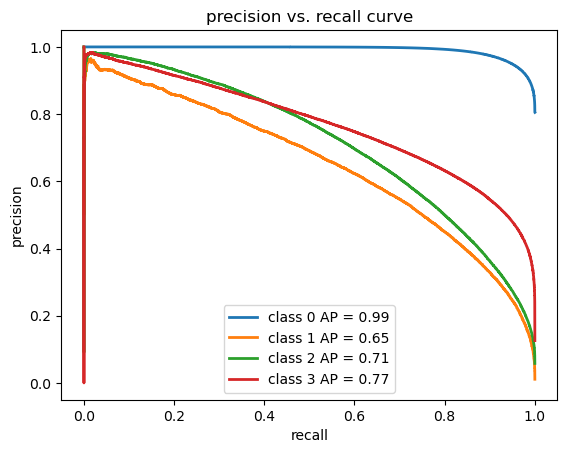

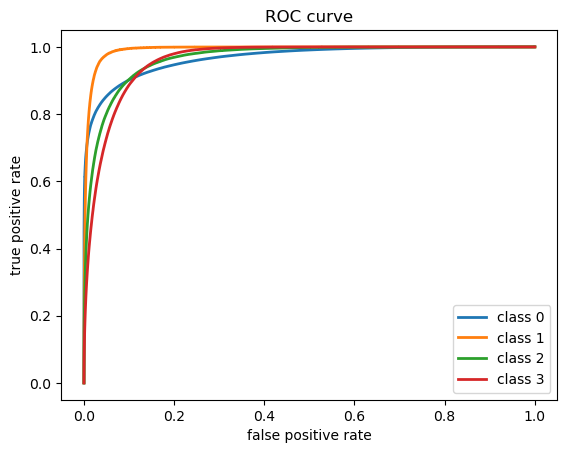

0 ROC AUC OvR: 0.9671
1 ROC AUC OvR: 0.9921
2 ROC AUC OvR: 0.9659
3 ROC AUC OvR: 0.9606
average ROC AUC OvR: 0.9714


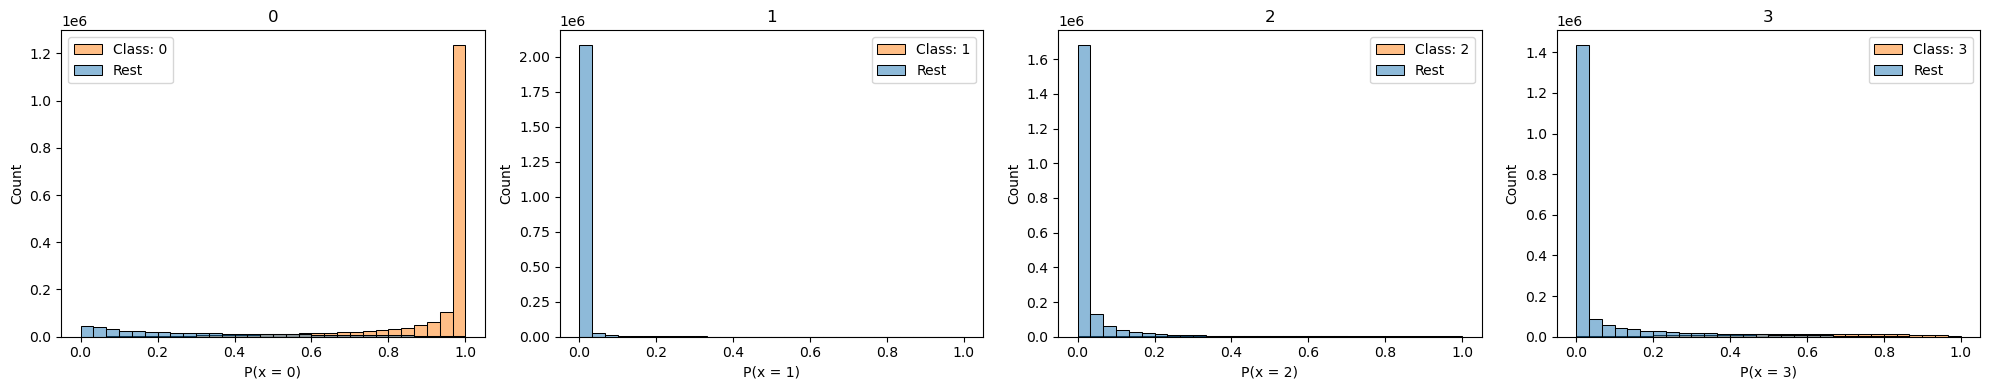

0 vs 1 ROC AUC OvO: 0.9947
1 vs 0 ROC AUC OvO: 0.9982
0 vs 2 ROC AUC OvO: 0.9590
2 vs 0 ROC AUC OvO: 0.9737
0 vs 3 ROC AUC OvO: 0.9684
3 vs 0 ROC AUC OvO: 0.9695
1 vs 2 ROC AUC OvO: 0.9905
2 vs 1 ROC AUC OvO: 0.9557
1 vs 3 ROC AUC OvO: 0.9539
3 vs 1 ROC AUC OvO: 0.6829
2 vs 3 ROC AUC OvO: 0.9172
3 vs 2 ROC AUC OvO: 0.8885
average ROC AUC OvO: 0.9377


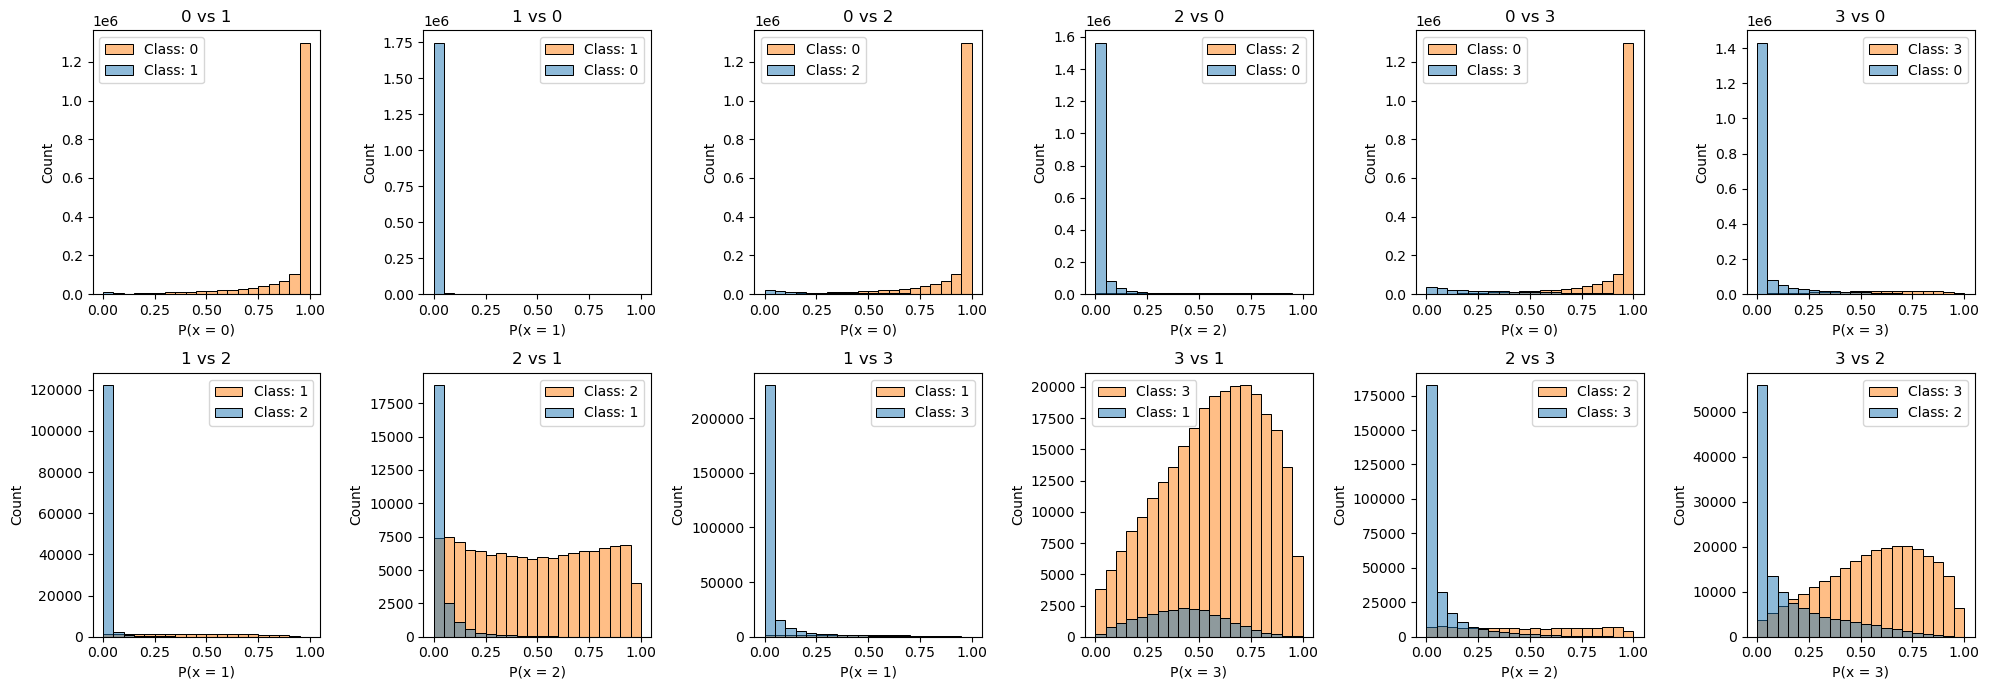

None


In [8]:
from src.model_utils import custom_multiclass_report

# check metrics
yprob = loaded_model.predict_proba(Xholdout)
ypred = np.argmax(yprob, 1)
ytest = yholdout


print(custom_multiclass_report(ytest, ypred, yprob))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90   1764289
           1       0.24      0.22      0.23     24864
           2       0.36      0.60      0.45    128977
           3       0.52      0.69      0.59    293070

    accuracy                           0.81   2211200
   macro avg       0.52      0.59      0.54   2211200
weighted avg       0.85      0.81      0.83   2211200



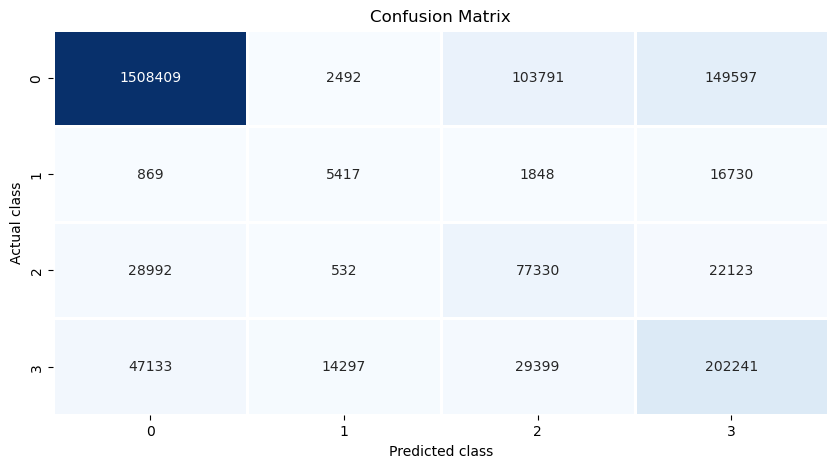

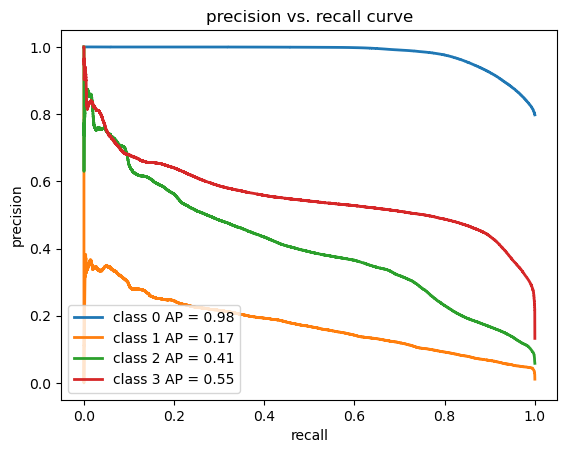

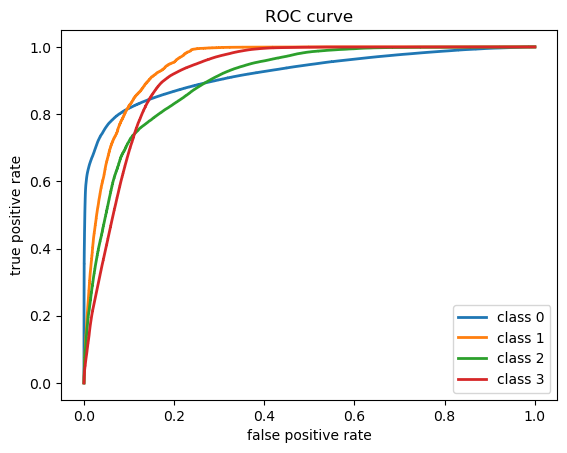

0 ROC AUC OvR: 0.9221
1 ROC AUC OvR: 0.9477
2 ROC AUC OvR: 0.9036
3 ROC AUC OvR: 0.9171
average ROC AUC OvR: 0.9226


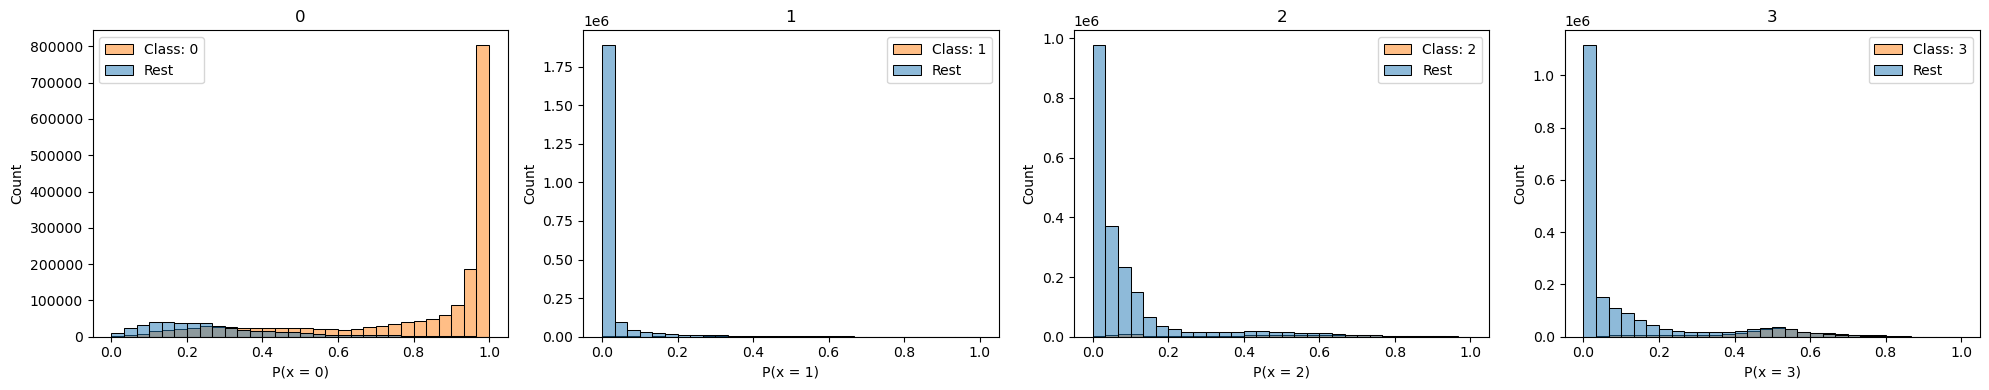

0 vs 1 ROC AUC OvO: 0.9667
1 vs 0 ROC AUC OvO: 0.9793
0 vs 2 ROC AUC OvO: 0.9089
2 vs 0 ROC AUC OvO: 0.9115
0 vs 3 ROC AUC OvO: 0.9241
3 vs 0 ROC AUC OvO: 0.9265
1 vs 2 ROC AUC OvO: 0.9244
2 vs 1 ROC AUC OvO: 0.8864
1 vs 3 ROC AUC OvO: 0.7678
3 vs 1 ROC AUC OvO: 0.5690
2 vs 3 ROC AUC OvO: 0.8575
3 vs 2 ROC AUC OvO: 0.8553
average ROC AUC OvO: 0.8731


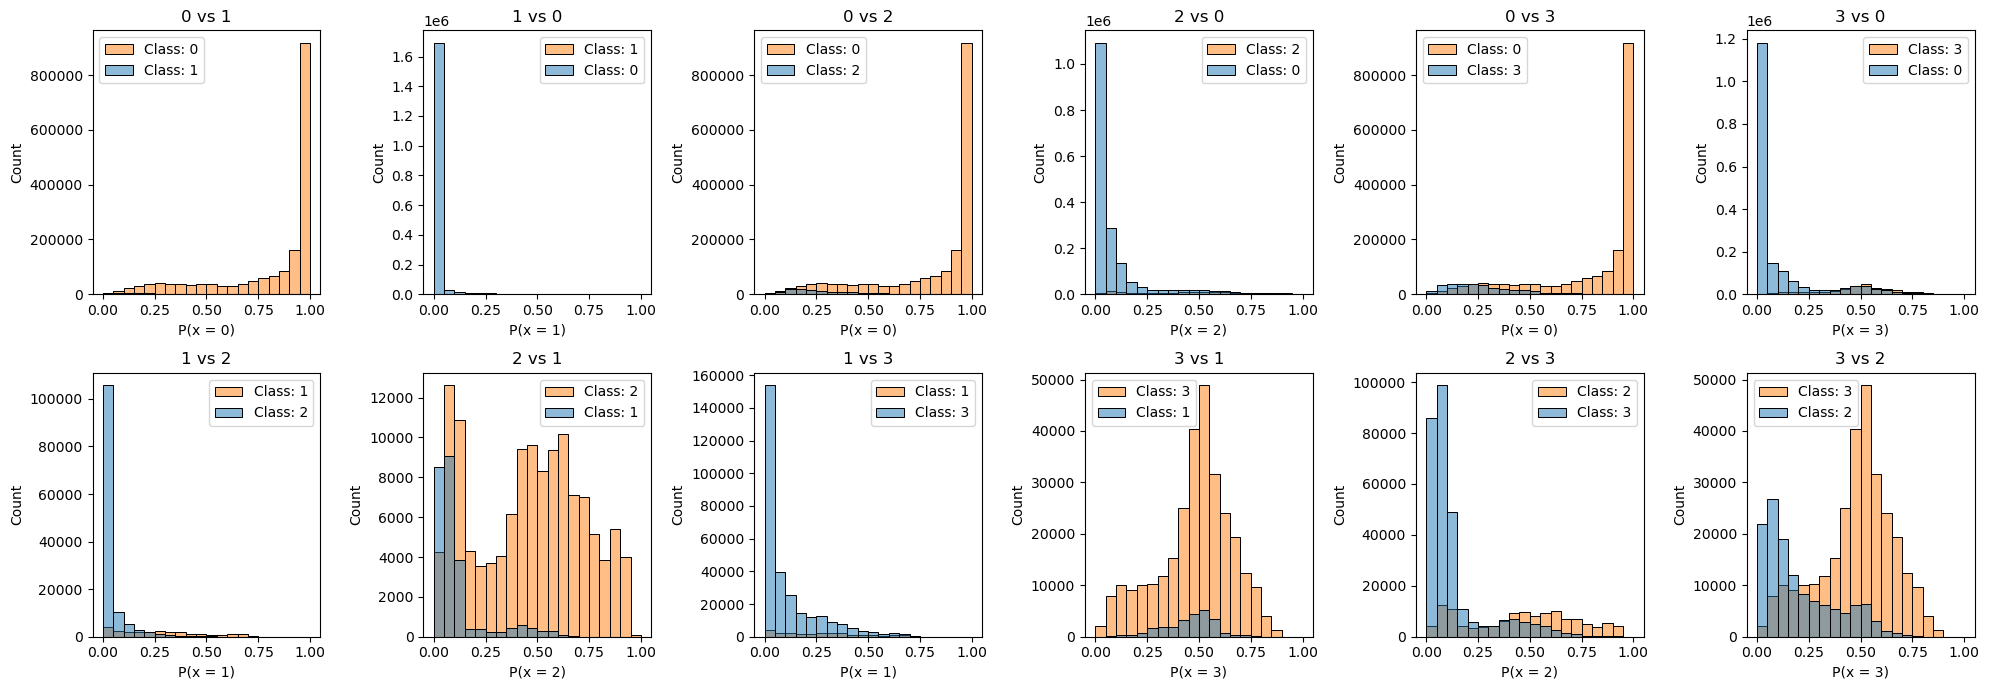

None


In [6]:
from src.model_utils import custom_multiclass_report

# check metrics
yprob = model.predict_proba(X_test)
ypred = np.argmax(yprob, 1)
ytest = y_test

print(custom_multiclass_report(ytest, ypred, yprob))

In [8]:
# Save the trained model to a file
model_filename = os.path.join('..', 'results', 'pickle_models', 'catboost_base_FR.pkl')
model.save_model(model_filename)
print("Model saved as:", model_filename)

Model saved as: ../results/pickle_models/catboost_base_FR.pkl
